### Importação dos dados



In [41]:
import pandas as pd
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [30]:
import math

loja1Total = pd.read_csv(url1)['Preço'].sum()
loja2Total = pd.read_csv(url2)['Preço'].sum()
loja3Total = pd.read_csv(url3)['Preço'].sum()
loja4Total = pd.read_csv(url4)['Preço'].sum()

print(f"Faturamento  da Loja 1: R${loja1Total:.2f}")
print(f"Faturamento da Loja 2: R${loja2Total:.2f}")
print(f"Faturamento  da Loja 3: R${loja3Total:.2f}")
print(f"Faturamento da Loja 4: R${loja4Total:.2f}")

# Faturamento total de todas as lojas
FaturamentoTotal = loja1Total + loja2Total + loja3Total + loja4Total
print(f"\nFaturamento total das lojas: R${FaturamentoTotal:.2f}")




Faturamento  da Loja 1: R$1534509.12
Faturamento da Loja 2: R$1488459.06
Faturamento  da Loja 3: R$1464025.03
Faturamento da Loja 4: R$1384497.58

Faturamento total das lojas: R$5871490.79


# 2. Vendas por Categoria


In [33]:
def vendas_por_categoria(loja, numero):
    vendas = loja.groupby('Categoria do Produto')['Preço'].sum()
    print(f"\nVendas por categoria na Loja {numero}:")
    print(vendas)

# Mostrar resultados para cada loja
vendas_por_categoria(loja1, 1)
vendas_por_categoria(loja2, 2)
vendas_por_categoria(loja3, 3)
vendas_por_categoria(loja4, 4)


Vendas por categoria na Loja 1:
Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64

Vendas por categoria na Loja 2:
Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64

Vendas por categoria na Loja 3:
Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
moveis      

# 3. Média de Avaliação das Lojas

In [37]:
def avaliacao_media(loja, numero):
    media = loja['Avaliação da compra'].mean()
    print(f"Avaliação média da Loja {numero}: {media:.2f}")

# Mostrar resultados para cada loja
avaliacao_media(loja1, 1)
avaliacao_media(loja2, 2)
avaliacao_media(loja3, 3)
avaliacao_media(loja4, 4)


Avaliação média na Loja 1: 3.98
Avaliação média na Loja 2: 4.04
Avaliação média na Loja 3: 4.05
Avaliação média na Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [42]:
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Ler todos os CSVs e adicionar uma coluna 'Loja'
df_total = pd.concat(
    [pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# Garantir os tipos corretos
df_total['Preço'] = df_total['Preço'].astype(float)
df_total['Quantidade de parcelas'] = df_total['Quantidade de parcelas'].astype(int)

# A receita é simplesmente o Preço (não multiplicamos pela quantidade de parcelas)
df_total['Receita'] = df_total['Preço']

# Agrupar por Loja e Produto somando a receita
vendas = df_total.groupby(['Loja', 'Produto'])['Receita'].sum().reset_index()

# Função para mostrar os 3 produtos que mais e menos dinheiro geraram
def top_produtos(loja):
    dados = vendas[vendas['Loja'] == loja]

    top_mais_vendidos = dados.sort_values(by='Receita', ascending=False).head(3)
    top_menos_vendidos = dados.sort_values(by='Receita', ascending=True).head(3)

    print(f"\n{loja} - TOP 3 produtos que MAIS dinheiro geraram:")
    for _, linha in top_mais_vendidos.iterrows():
        print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

    print(f"\n{loja} - TOP 3 produtos que MENOS dinheiro geraram:")
    for _, linha in top_menos_vendidos.iterrows():
        print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

# Lista única de lojas
lojas_unicas = vendas['Loja'].unique()

# Mostrar resultados para cada loja
for loja in lojas_unicas:
    top_produtos(loja)



Loja 1 - TOP 3 produtos que MAIS dinheiro geraram:
  TV Led UHD 4K - Receita: R$189534.28
  Geladeira - Receita: R$149524.28
  Celular Plus X42 - Receita: R$130536.40

Loja 1 - TOP 3 produtos que MENOS dinheiro geraram:
  Corda de pular - Receita: R$870.89
  Dinossauro Rex - Receita: R$918.40
  Cubo mágico 8x8 - Receita: R$929.27

Loja 2 - TOP 3 produtos que MAIS dinheiro geraram:
  Celular Plus X42 - Receita: R$150967.83
  TV Led UHD 4K - Receita: R$137833.06
  Geladeira - Receita: R$130176.48

Loja 2 - TOP 3 produtos que MENOS dinheiro geraram:
  Cubo mágico 8x8 - Receita: R$858.22
  Dinossauro Rex - Receita: R$1027.41
  Corda de pular - Receita: R$1142.54

Loja 3 - TOP 3 produtos que MAIS dinheiro geraram:
  Geladeira - Receita: R$133185.99
  TV Led UHD 4K - Receita: R$128892.11
  Celular Plus X42 - Receita: R$124300.84

Loja 3 - TOP 3 produtos que MENOS dinheiro geraram:
  Cubo mágico 8x8 - Receita: R$853.81
  Dinossauro Rex - Receita: R$1060.78
  Corda de pular - Receita: R$1137.

# 5. Frete Médio por Loja


In [43]:
# Garantir que o custo de envio é numérico
df_total['Frete'] = df_total['Frete'].astype(float)

# Agrupar por loja e calcular a média do custo de envio
envio_medio = df_total.groupby('Loja')['Frete'].mean()

# Mostrar resultados
print("\nEnvio médio por loja:")
for loja, medio in envio_medio.items():
    print(f"{loja}: R${medio:.2f}")



Envio médio por loja:
Loja 1: R$34.69
Loja 2: R$33.62
Loja 3: R$33.07
Loja 4: R$31.28


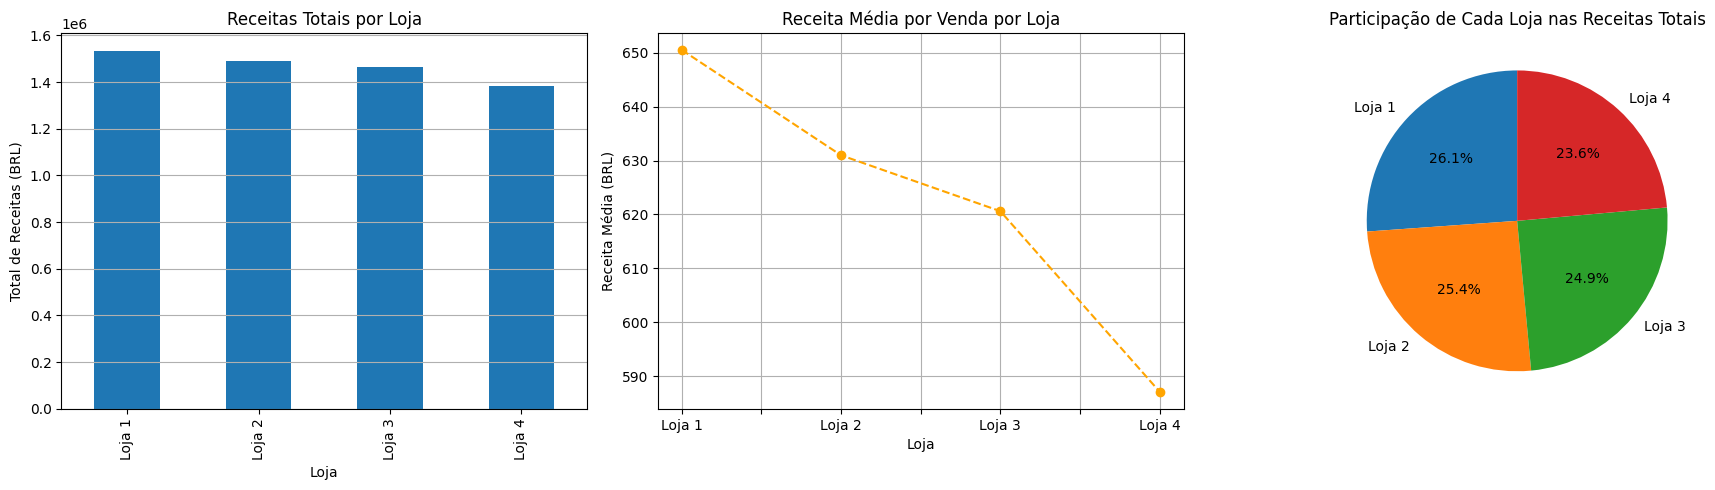

In [47]:
import matplotlib.pyplot as plt

# Garantir tipo correto
df_total['Preço'] = df_total['Preço'].astype(float)

# A receita de cada venda é simplesmente o preço
df_total['Receita'] = df_total['Preço']

# Agrupar dados
receitas_totais = df_total.groupby('Loja')['Receita'].sum()
receita_media = df_total.groupby('Loja')['Receita'].mean()
distribuicao_receitas = receitas_totais

# Criar subplots em uma única linha
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1. Barra vertical: Total de receitas
receitas_totais.plot(kind='bar', ax=axs[0])
axs[0].set_title('Receitas Totais por Loja')
axs[0].set_ylabel('Total de Receitas (BRL)')
axs[0].set_xlabel('Loja')
axs[0].grid(axis='y')

# 2. Linha: Receita média por venda
receita_media.plot(kind='line', marker='o', linestyle='--', color='orange', ax=axs[1])
axs[1].set_title('Receita Média por Venda por Loja')
axs[1].set_ylabel('Receita Média (BRL)')
axs[1].set_xlabel('Loja')
axs[1].grid(True)

# 3. Pizza: Distribuição do total
distribuicao_receitas.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axs[2])
axs[2].set_title('Participação de Cada Loja nas Receitas Totais')
axs[2].set_ylabel('')  # Remover rótulo vertical do gráfico de pizza

# Ajustar layout
plt.tight_layout()
plt.show()


# RELATÓRIO FINAL:


A partir da análise dos dados das quatro lojas do João, ficou claro o desempenho de cada unidade em relação ao faturamento total. Baseando-me nisso, darei um parecer geral sobre as lojas, enfim, a uma opinião de qual loja deveria ser vendida com base nos dados mencionados.

#Faturamento Total:

A loja que mais fatura é a Loja 1, com R$1.534.509,12, seguida da Loja 2 (R$1.488.459,06), Loja 3 (R$1.464.025,03) e, por fim, a Loja 4, com o menor faturamento: R$1.384.497,58. Isso já demonstra que a Loja 4 tem um desempenho financeiro inferior em comparação às outras lojas.

#Categorias Mais e Menos Vendidas:

Em todas as lojas, os principais produtos de receita são eletrônicos, eletrodomésticos e móveis, com destaque para produtos como TVs, geladeiras e celulares. Por outro lado, brinquedos e produtos de lazer são os que menos geram receita, produtos estes que são vendidos especialmente em maior quantidade na Loja 4, mas que apesar disso, não chegam a gerar lucro chamativo.

#Avaliações de Clientes:

As avaliações baseadas nas experiências dos clientes:

    Loja 1: 3,98 (4° Lugar)

    Loja 2: 4,04 (2° Lugar)

    Loja 3: 4,05 (1° Lugar)

    Loja 4: 4,00 (3° Lugar)

Apesar da Loja 4 não ter a pior nota, ela também não se destaca, ficando com a segunda pior avaliação entre as lojas.


#Frete Médio:

    Loja 1: R$34,69

    Loja 2: R$33,62

    Loja 3: R$33,07

    Loja 4: R$31,28 (menor custo)

Embora a Loja 4 tenha o frete mais barato, essa pequena economia não compensa seu baixo faturamento e menor geração de receita por produto, já que o foco do negócio deve ser a lucratividade total, e não apenas a economia em logística.

#Produtos de Maior e Menor Receita:

Todas as lojas seguem uma tendência parecida de produtos mais vendidos: TVs, geladeiras e celulares. No entanto, o total arrecadado por esses itens é sempre inferior na Loja 4. Da mesma forma, os produtos com pior desempenho são repetidamente brinquedos e utilitários com pouco apelo comercial, que apesar de ter maior quantidade de vendas na Loja 4, não geram receita suficiente para sustentar a operação da loja ou compensar o fraco desempenho nas demais categorias de maior valor agregado.

# Conclusão:

A partir dos dados observados, conclui-se que a Loja 4 é a que menos gera lucros, possui a segunda pior avaliação dos clientes, e ainda que apresente o frete mais barato, esse fator não é suficiente para compensar seu baixo desempenho geral.

Além disso, os produtos mais vendidos na Loja 4 geram receitas inferiores aos das outras lojas, e os produtos com menor receita também são mais numerosos, demonstrando um baixo poder de giro de estoque.

Portanto, recomenda-se que o Senhor João venda a Loja 4, por ser a unidade menos lucrativa, com menor potencial de crescimento, e que menos se destaca em termos de avaliação, faturamento e performance geral. Manter as lojas 1, 2 e 3 é mais estratégico para o negócio, pois elas têm melhor desempenho e maior margem de crescimento no mercado.